In [1]:
# Import calibration functions
# Run this to reimport without having to restart the whole notebook
import radial_velocity_functions
import importlib
importlib.reload(radial_velocity_functions)
from radial_velocity_functions import *

\begin{equation}
\mathrm{RMS} / \text { line }\left[\mathrm{m} \mathrm{s}^{-1}\right]=\sqrt{\sum_{n=1}^{N} \sum_{p=1}^{P} \frac{\left[\frac{\left(\lambda_{n, p, \text { pred. }}-\lambda_{p, \text { theory }}\right)}{\lambda_{p, \text { theory }}} \times c\right]^{2}}{N \times P}}
\end{equation}

In [3]:
def compute_RMS_velocity(features, coords):

    result = []
    for coord in tqdm(coords):
        x = coord[0]
        y = coord[1]
        matches = find_feature_matches2(features[x], features[y])

        lambda1, lambda2 = [], []
        for match in matches:
            f1, f2 = match[0], match[1]
            l1, l2 = f1[3], f2[3]
            lambda1.append(l1)
            lambda2.append(l2)

        lambda1 = np.asarray(lambda1)
        lambda2 = np.asarray(lambda2)

        s = (lambda1 - lambda2)/lambda2
        c = 299792458

        rms = np.sqrt( np.sum( (s * c) ** 2  / len(matches) ) )
        result.append(rms)
    return result    

In [4]:
filenames = get_spectra_filenames_without_duplicate_dates(SPECTRA_PATH_34411)

# Find features in all files 
features = []
print("Finding features for all files...")
for filename in tqdm(filenames):
    features.append(find_features(filename, log=False))

# Setup coords :: Compute one list of coords
size = len(filenames)
coords = []
for x in np.arange(size):
    for y in np.arange(x, size):
        if x != y:
            coords.append((x, y)) 
        

result = compute_RMS_velocity(features, coords)

Finding features for all files...


100%|██████████| 1653/1653 [00:18<00:00, 88.25it/s]


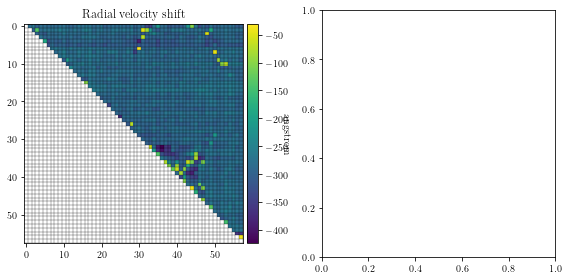

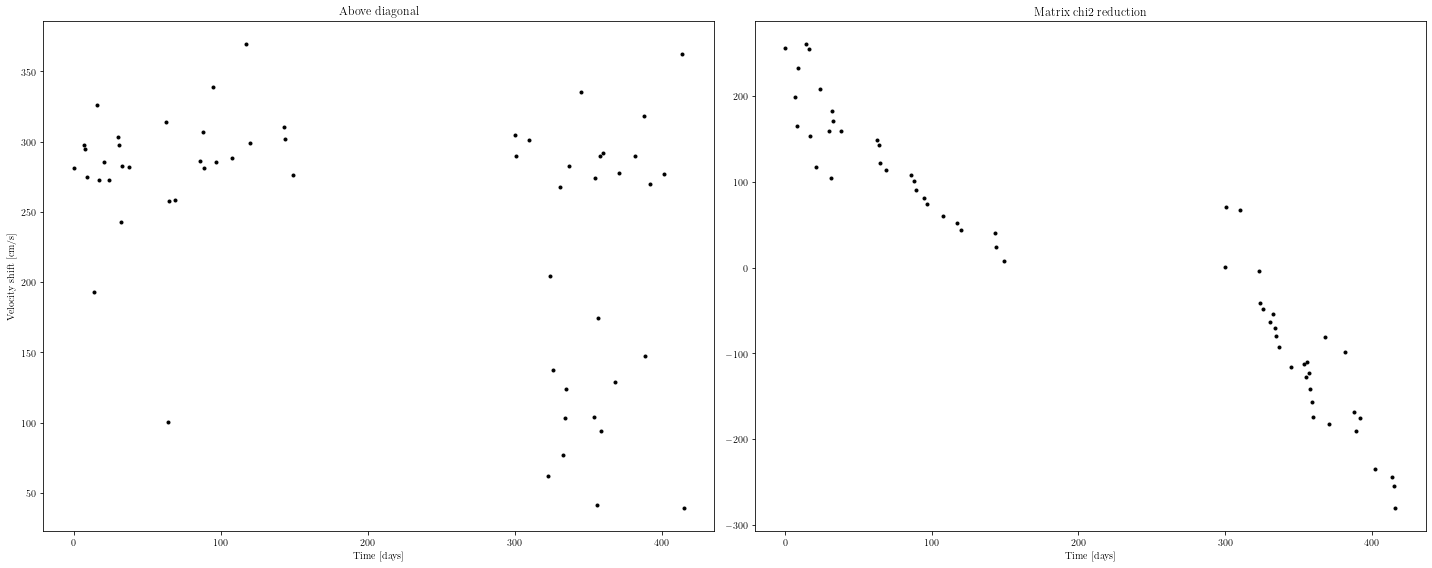

In [5]:
size = np.max(np.max(coords)) + 1
diff_matrix = make_nan_matrix(size)

for coord, rms in zip(coords, result):
    x = coord[0]
    y = coord[1]

    diff_matrix[x, y] = rms


plot_matrix(diff_matrix, plot_ratio=False)
m, final_shifts, final_shifts_err = matrix_reduce_results_rms(diff_matrix, plot=True)
